**Image Recognition: Model Hub**
- download the model from the Model Hub
- recognize the object on photo

In [1]:
 @file:Repository("*mavenLocal")

In [2]:
import org.jetbrains.kotlinx.dl.api.summary.printSummary
import org.jetbrains.kotlinx.dl.impl.preprocessing.image.ImageConverter
import org.jetbrains.kotlinx.dl.onnx.inference.ONNXModelHub
import org.jetbrains.kotlinx.dl.onnx.inference.ONNXModels
import java.io.File
import javax.imageio.ImageIO
import second.PROJECT_ROOT

In [3]:
val PATH_TO_IMAGE = "${PROJECT_ROOT}src/main/resources/datasets/kdog.jpg"

val PATH_TO_PRETRAINED_MODELS = "../../../cache/pretrainedModels"

**Download the model from the model hub**

In [4]:
val modelHub = ONNXModelHub(cacheDirectory = File(PATH_TO_PRETRAINED_MODELS))
val recognitionModel = ONNXModels.CV.ResNet50.pretrainedModel(modelHub)

In [5]:
recognitionModel.printSummary()

ResNet50 model summary
Model type: ONNX
_________________________________________________________________
Inputs               Type                                        
data                 Tensor {dtype=FLOAT, shape [1, 3, 224, 224]}
_________________________________________________________________
Outputs              Type                                        
resnetv17_dense0_fwd Tensor {dtype=FLOAT, shape [1, 1000]}       
_________________________________________________________________


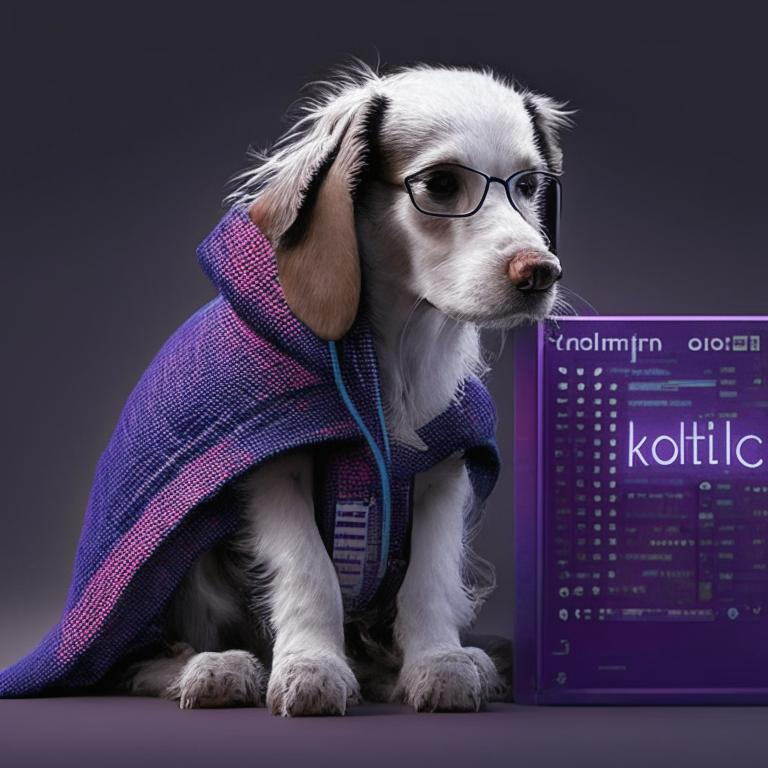

In [6]:
val image = ImageIO.read(File(PATH_TO_IMAGE))

DISPLAY(image)

**What does ResNet'50 see on this picture?**

In [7]:
val recognizedObject = recognitionModel.predictObject(image)
println(recognizedObject)

val recognizedObjects = recognitionModel.predictTopKObjects(image, topK = 5)
println(recognizedObjects.toString())
recognitionModel.close()

clumber
[(clumber, 9.981655), (Blenheim_spaniel, 8.709847), (Chihuahua, 9.534117), (hair_spray, 6.7476106), (Weimaraner, 7.3106318)]
